In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
cd /g/data/tm70/as2285/payu/025_ryf_momsupergrid_diag/archive/output000

/scratch/tm70/as2285/access-om3/archive/025_ryf_momsupergrid_diag/output000


In [4]:
file = ! ls access-om3.cice.1day.mean.1900-01-01.nc

In [5]:
file

['access-om3.cice.1day.mean.1900-01-01.nc']

In [6]:
cice_ds = xr.open_dataset(file[0])

In [7]:
list(cice_ds.variables)

['time',
 'time_bounds',
 'TLON',
 'TLAT',
 'ULON',
 'ULAT',
 'NLON',
 'NLAT',
 'ELON',
 'ELAT',
 'NCAT',
 'VGRDi',
 'VGRDs',
 'VGRDb',
 'VGRDa',
 'tmask',
 'umask',
 'nmask',
 'emask',
 'blkmask',
 'tarea',
 'uarea',
 'narea',
 'earea',
 'dxt',
 'dyt',
 'dxu',
 'dyu',
 'dxn',
 'dyn',
 'dxe',
 'dye',
 'HTN',
 'HTE',
 'ANGLE',
 'ANGLET',
 'lont_bounds',
 'latt_bounds',
 'lonu_bounds',
 'latu_bounds',
 'lonn_bounds',
 'latn_bounds',
 'lone_bounds',
 'late_bounds',
 'hi',
 'hs',
 'aice',
 'uvel',
 'vvel',
 'frzmlt',
 'congel',
 'frazil',
 'snoice',
 'dvidtt',
 'dvidtd',
 'sifb']

In [10]:
cice_gridvars = [
    'TLON',
 'TLAT',
 'ULON',
 'ULAT',
 'NLON',
 'NLAT',
 'ELON',
 'ELAT',
 'tmask',
 'umask',
 'nmask',
 'emask',
 'blkmask',
 'tarea',
 'uarea',
 'narea',
 'earea',
 'dxt',
 'dyt',
 'dxu',
 'dyu',
 'dxn',
 'dyn',
 'dxe',
 'dye',
 'HTN',
 'HTE',
 'ANGLE',
 'ANGLET',
 ]

In [11]:
cice_ds[cice_gridvars]

<xarray.Dataset> Size: 382MB
Dimensions:  (nj: 1142, ni: 1440)
Coordinates:
    TLON     (nj, ni) float64 13MB ...
    TLAT     (nj, ni) float64 13MB ...
    ULON     (nj, ni) float64 13MB ...
    ULAT     (nj, ni) float64 13MB ...
    NLON     (nj, ni) float64 13MB ...
    NLAT     (nj, ni) float64 13MB ...
    ELON     (nj, ni) float64 13MB ...
    ELAT     (nj, ni) float64 13MB ...
Dimensions without coordinates: nj, ni
Data variables: (12/21)
    tmask    (nj, ni) float64 13MB ...
    umask    (nj, ni) float64 13MB ...
    nmask    (nj, ni) float64 13MB ...
    emask    (nj, ni) float64 13MB ...
    blkmask  (nj, ni) float64 13MB ...
    tarea    (nj, ni) float64 13MB ...
    ...       ...
    dxe      (nj, ni) float64 13MB ...
    dye      (nj, ni) float64 13MB ...
    HTN      (nj, ni) float64 13MB ...
    HTE      (nj, ni) float64 13MB ...
    ANGLE    (nj, ni) float64 13MB ...
    ANGLET   (nj, ni) float64 13MB ...
Attributes:
    title:               access-om3
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 19000102
    comment3:            seconds elapsed into model date:      0
    time_period_freq:    day_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2025-03-25 at 13:50
    io_flavor:           io_pio2 hdf5

Sanity check cice fields:

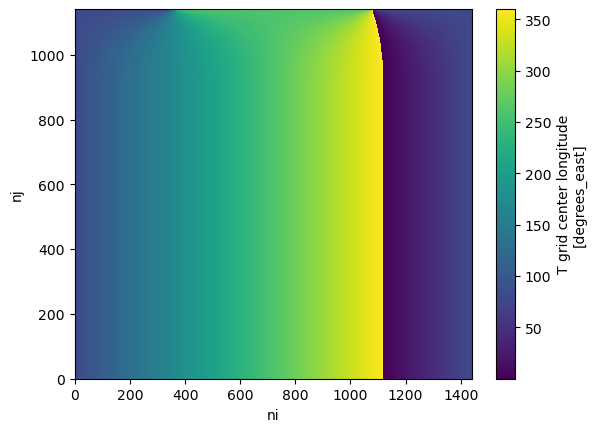

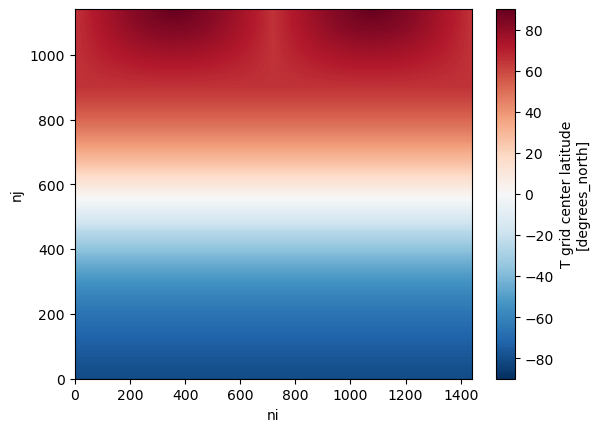

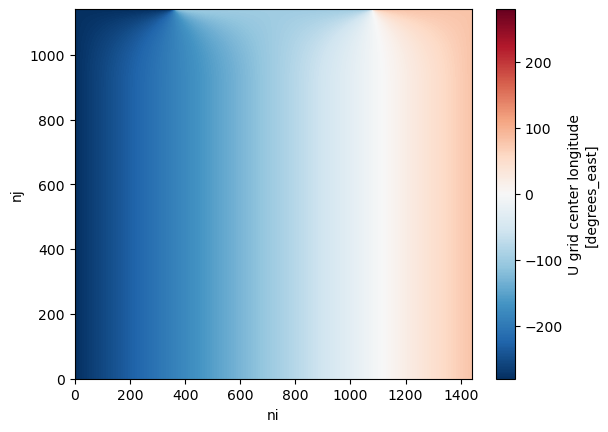

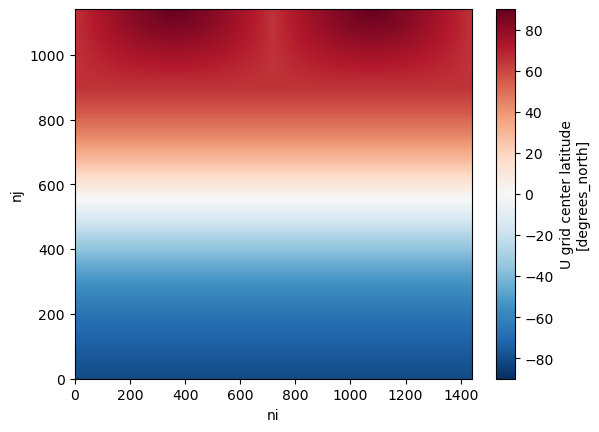

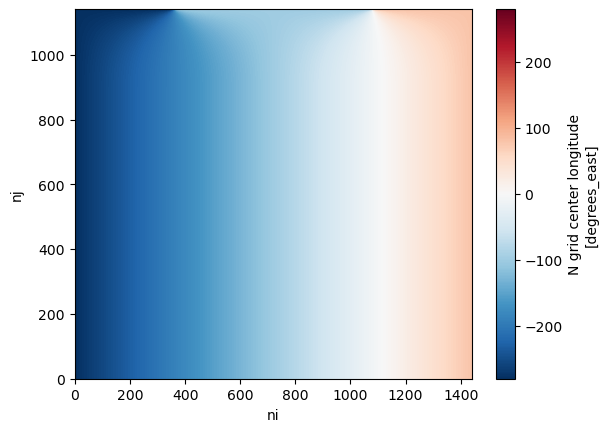

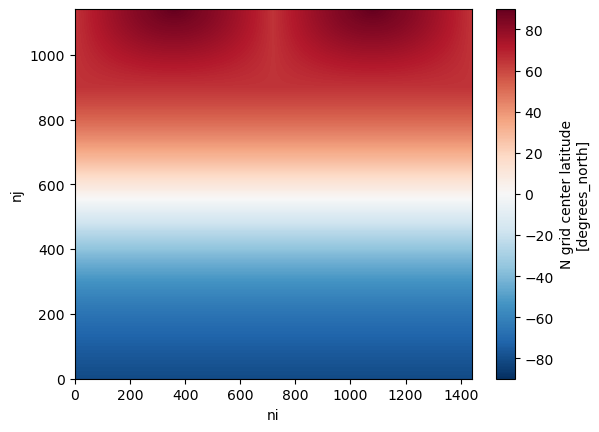

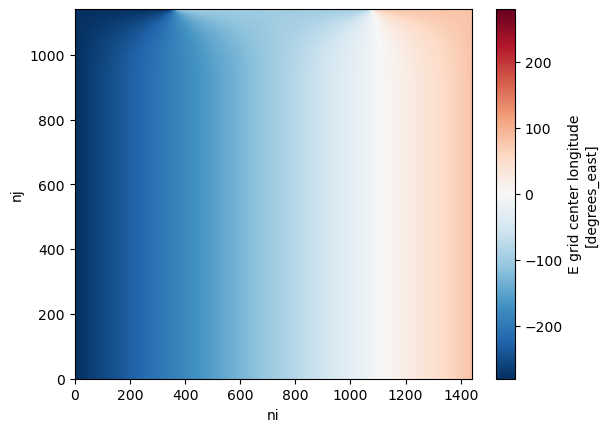

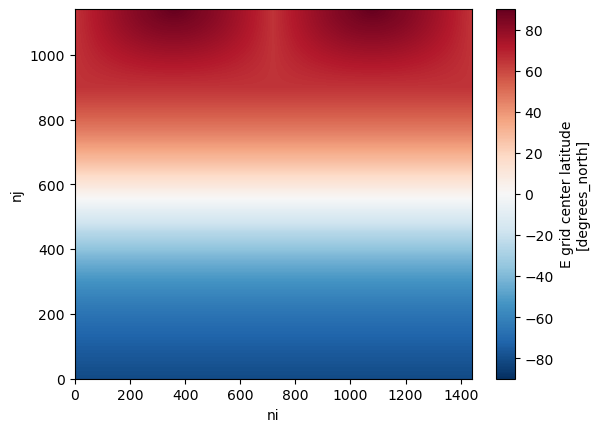

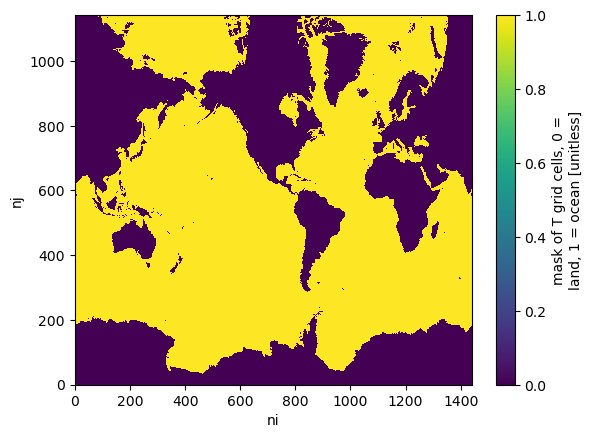

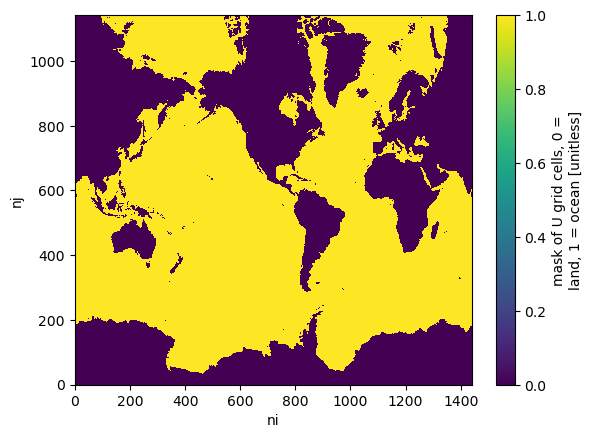

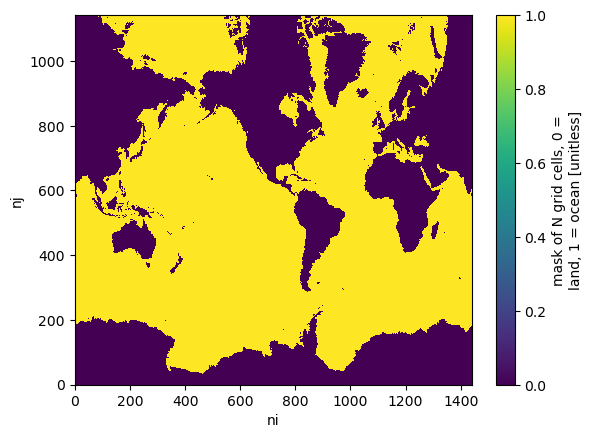

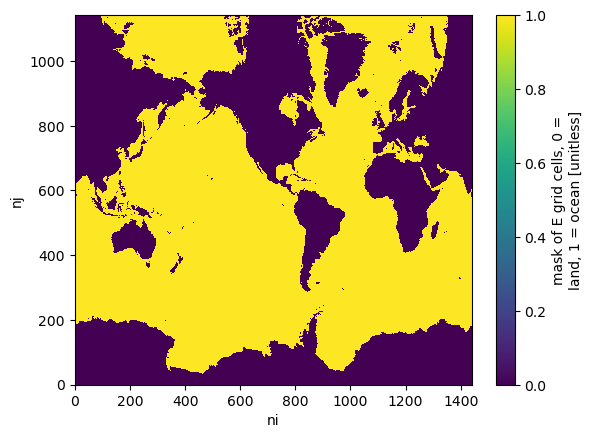

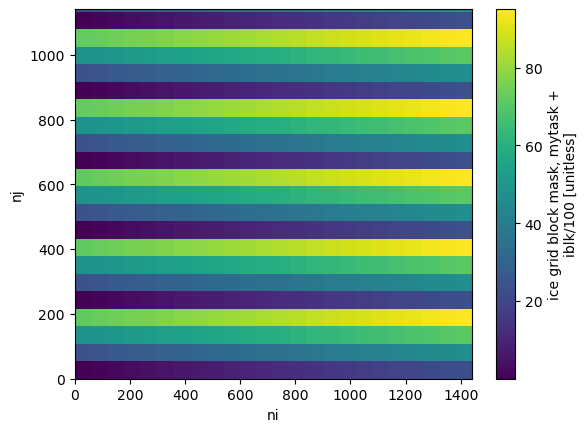

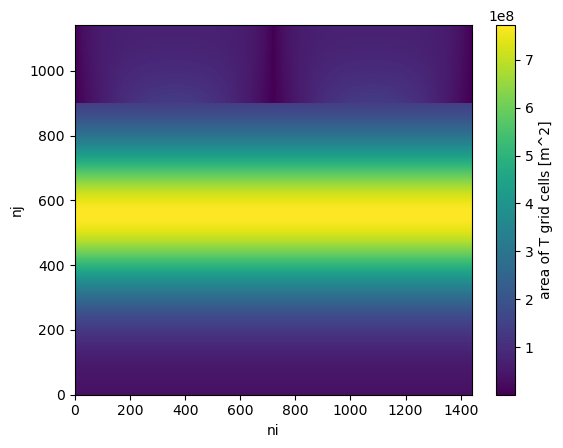

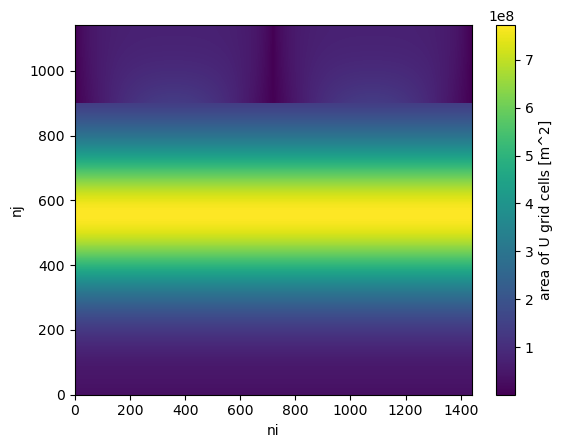

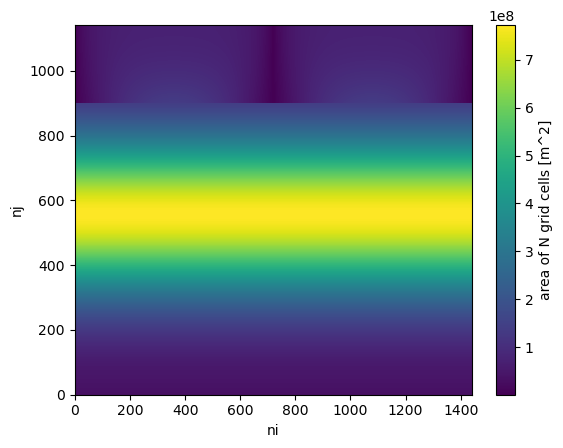

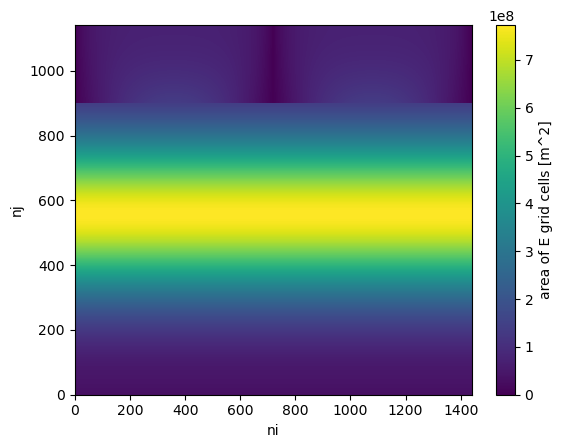

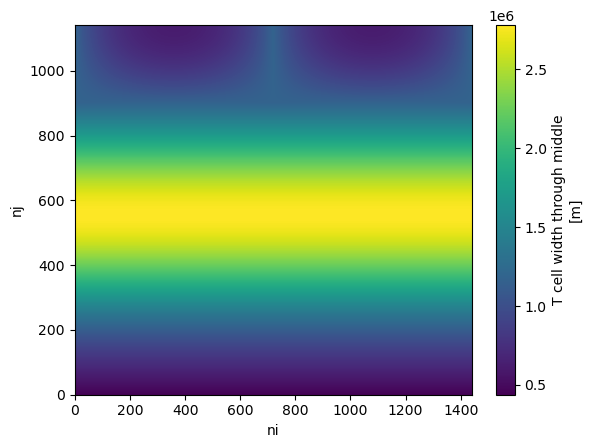

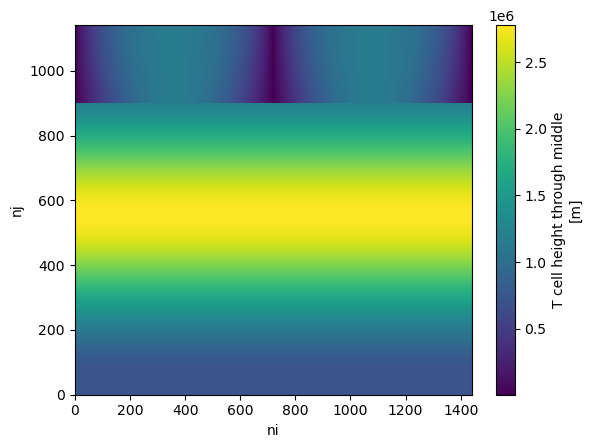

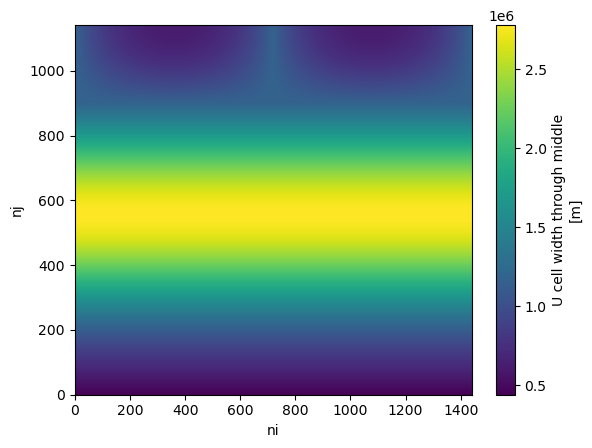

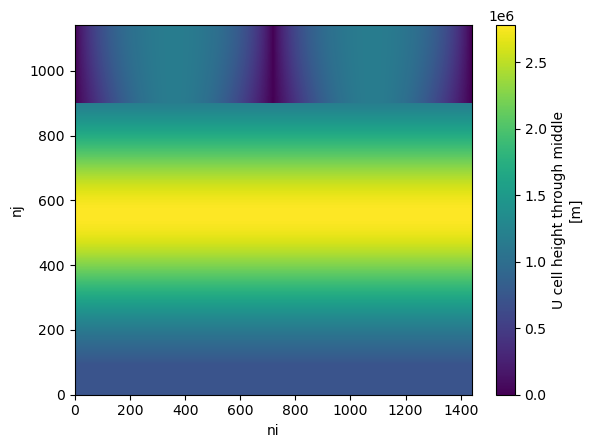

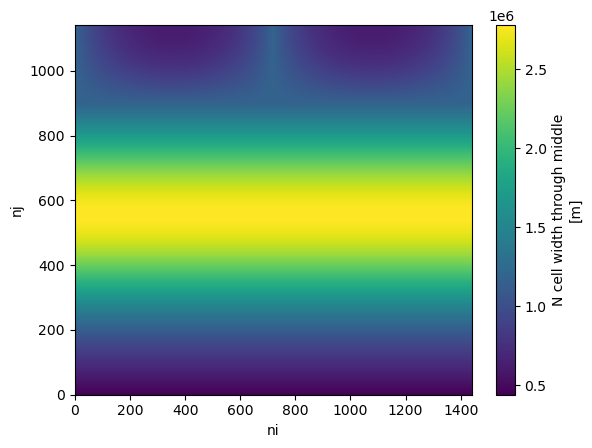

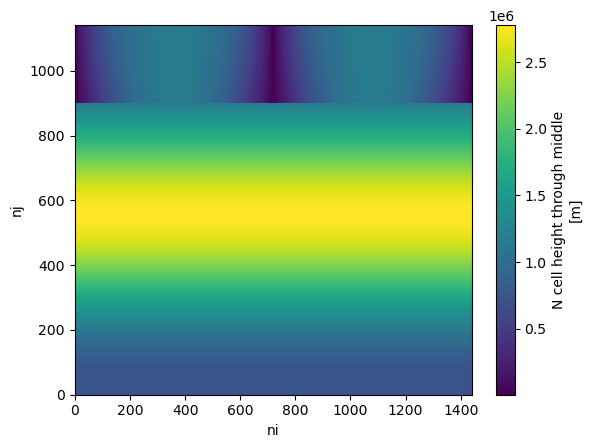

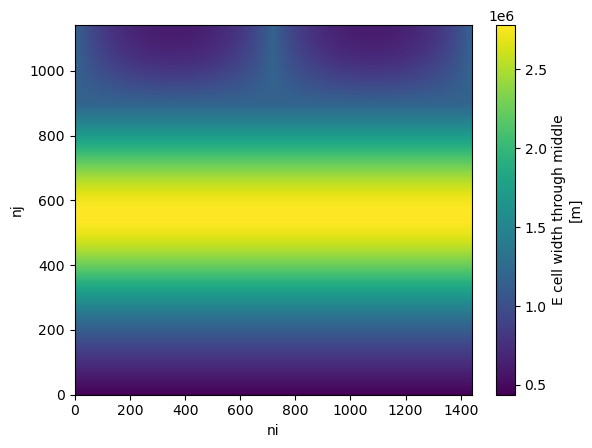

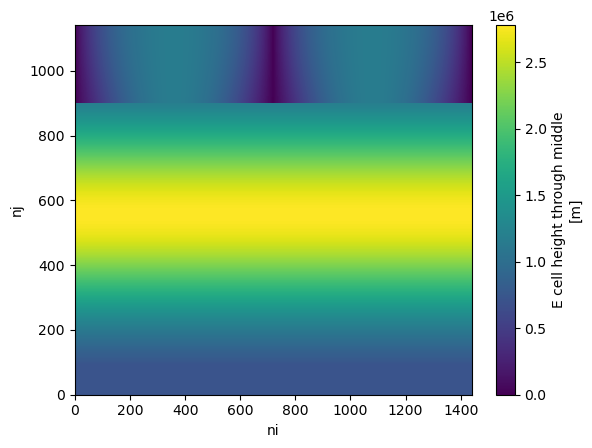

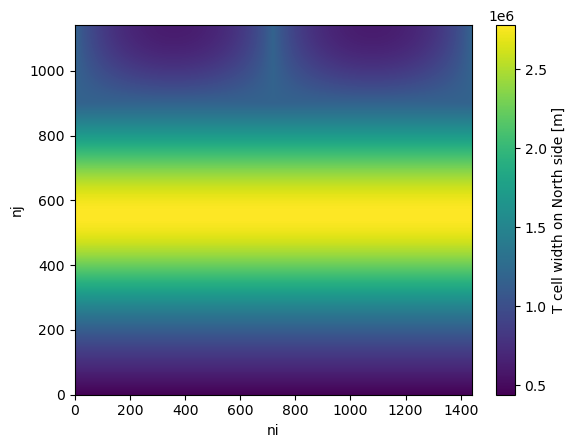

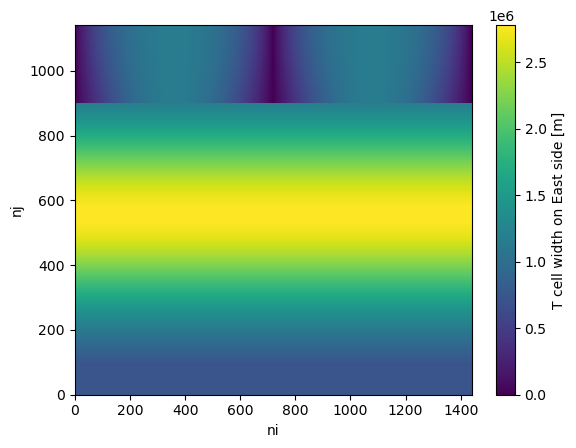

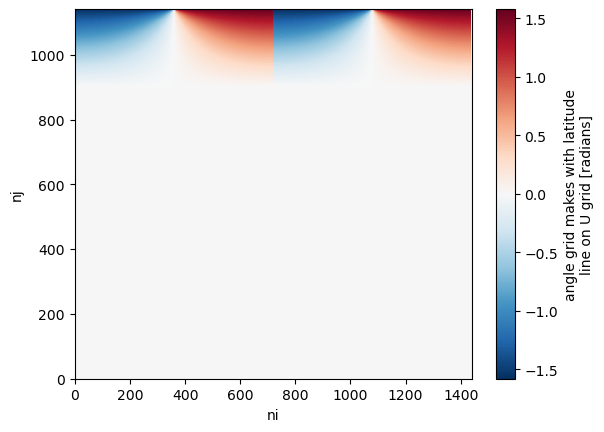

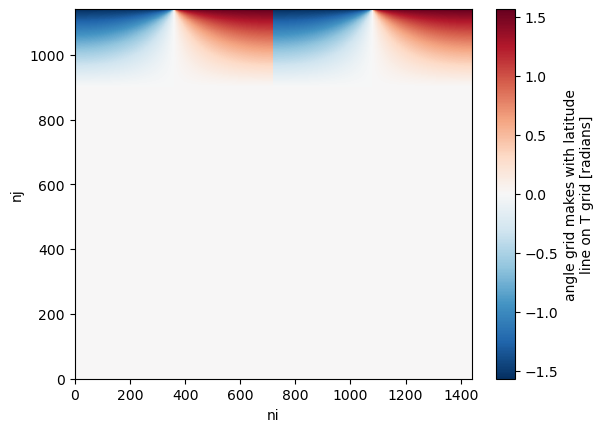

In [12]:
for g in cice_gridvars:
    cice_ds[g].plot()
    plt.show()

In [9]:
mom_ds = xr.open_dataset('access-om3.mom6.h.static.nc')

In [10]:
mom_ds

<xarray.Dataset> Size: 178MB
Dimensions:       (xh: 1440, yh: 1142, time: 1, xq: 1440, yq: 1142)
Coordinates:
  * xh            (xh) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yh            (yh) float64 9kB -80.94 -80.87 -80.81 ... 89.74 89.84 89.95
  * time          (time) object 8B 0001-01-01 00:00:00
  * xq            (xq) float64 12kB -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yq            (yq) float64 9kB -80.9 -80.84 -80.77 ... 89.79 89.9 90.0
Data variables: (12/27)
    geolon        (yh, xh) float32 7MB ...
    geolat        (yh, xh) float32 7MB ...
    geolon_c      (yq, xq) float32 7MB ...
    geolat_c      (yq, xq) float32 7MB ...
    geolon_u      (yh, xq) float32 7MB ...
    geolat_u      (yh, xq) float32 7MB ...
    ...            ...
    dyt           (yh, xh) float32 7MB ...
    dxCu          (yh, xq) float32 7MB ...
    dyCu          (yh, xq) float32 7MB ...
    dxCv          (yq, xh) float32 7MB ...
    dyCv          (yq, xh) float32 7MB ...
    dxCvo         (yq, xh) float32 7MB ...
Attributes:
    NumFilesInSet:  1
    title:          MOM6 diagnostic fields table
    grid_type:      regular
    grid_tile:      N/A

The MOM grid is only at single precision. So we only expect about 7 decimal digit accuracy.

# Compare angles

For angles & lon/lat between 360 & -360, expect single precision would be 0.001

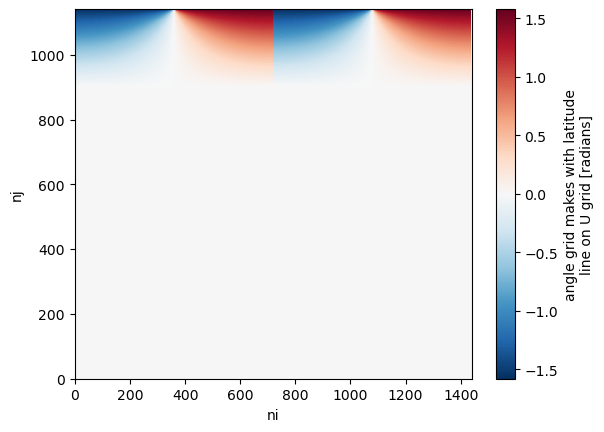

In [15]:
cice_ds['ANGLE'].plot()

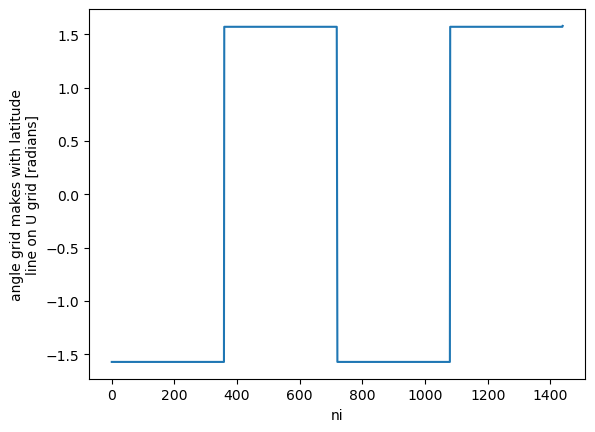

In [16]:
cice_ds['ANGLE'].isel(nj=-1).plot()

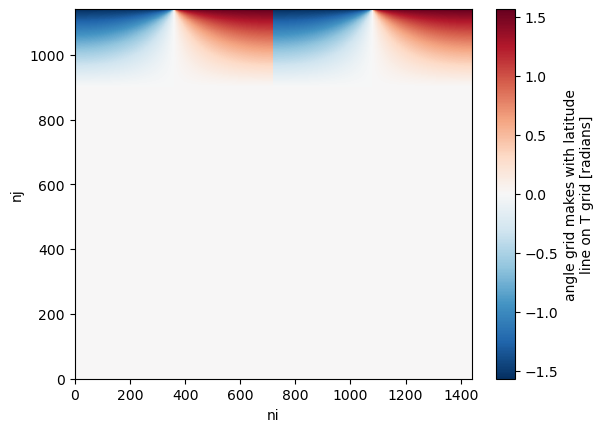

In [17]:
cice_ds['ANGLET'].plot()

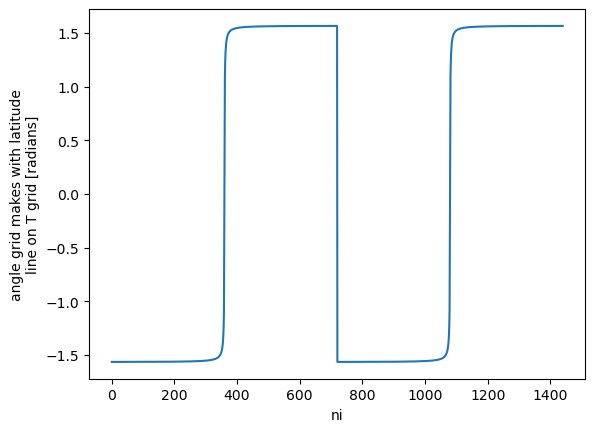

In [18]:
cice_ds['ANGLET'].isel(nj=-1).plot()

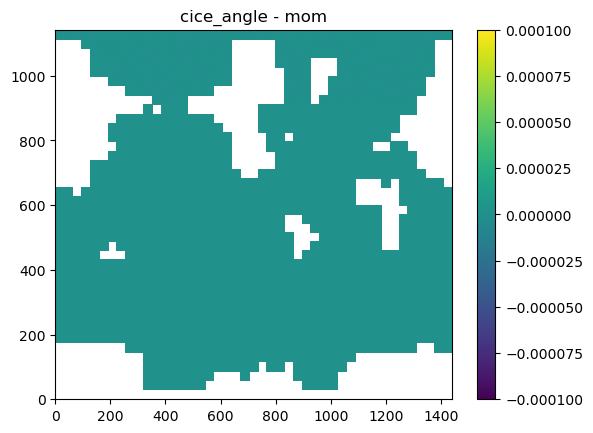

In [19]:
plt.pcolor(((np.sin(cice_ds['ANGLET'].values) - mom_ds['sin_rot']).values), vmin=-.0001, vmax=.0001)
plt.colorbar()
plt.title(f'cice_angle - mom')
plt.show()

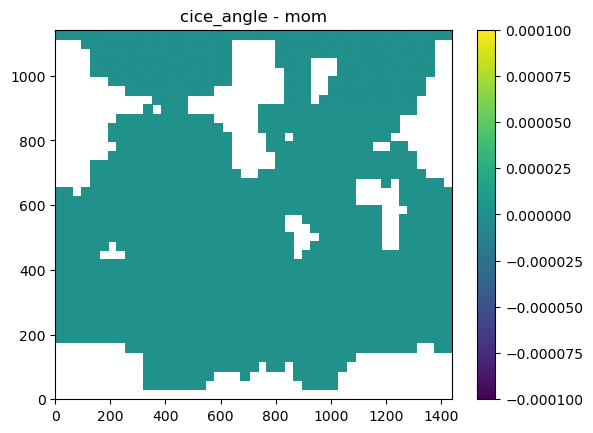

In [20]:
plt.pcolor(((np.cos(cice_ds['ANGLET'].values) - mom_ds['cos_rot']).values), vmin=-.0001, vmax=.0001)
plt.colorbar()
plt.title(f'cice_angle - mom')
plt.show()

# Compare lat / lon /masks

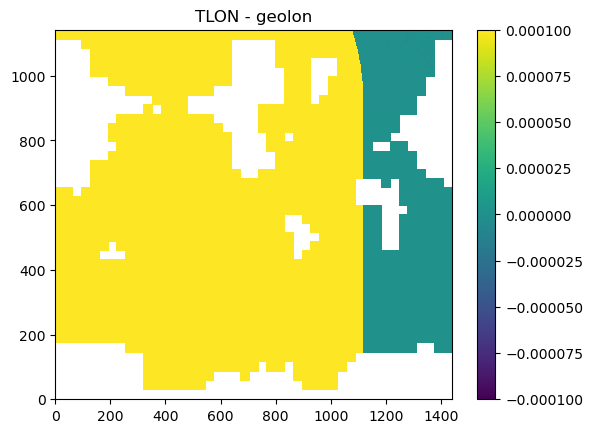

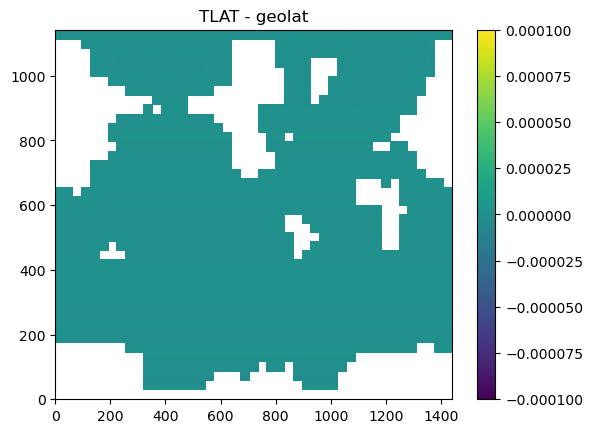

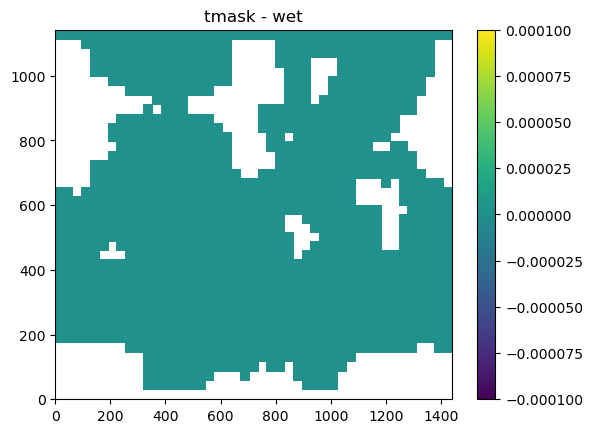

In [21]:
#mapping from CICE to MOM names
var_map = [
    ('TLON','geolon'),
    ('TLAT','geolat'),
    ('tmask','wet'),
]

for c,m in var_map:
    plt.pcolor((cice_ds[c].values - (mom_ds[m]).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

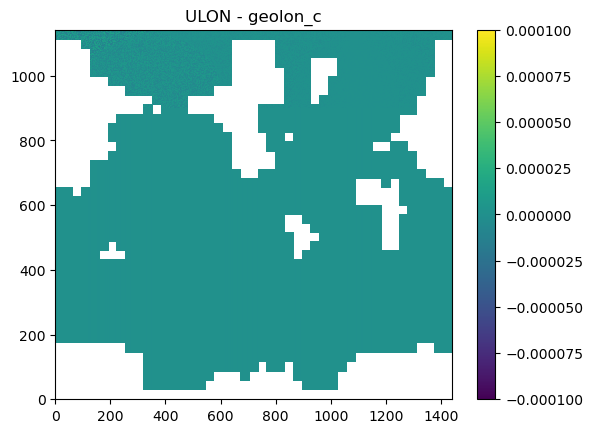

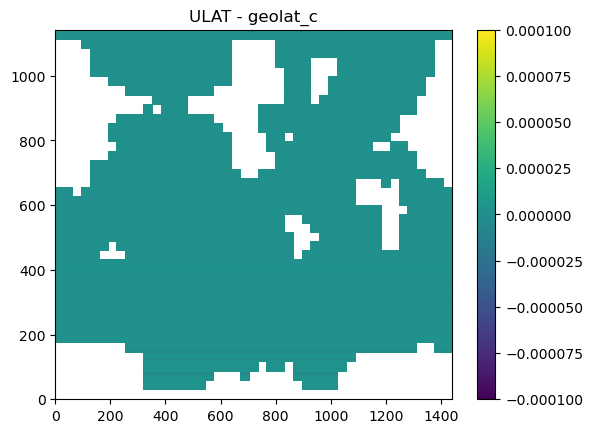

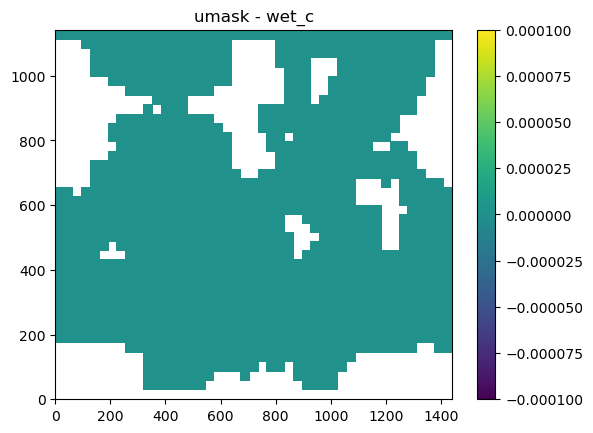

In [23]:
#mapping from CICE to MOM names
var_map = [
    ('ULON', 'geolon_c'),
    ('ULAT', 'geolat_c'),
    ('umask','wet_c'),
]

for c,m in var_map:
    plt.pcolor((cice_ds[c].values - (mom_ds[m]).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

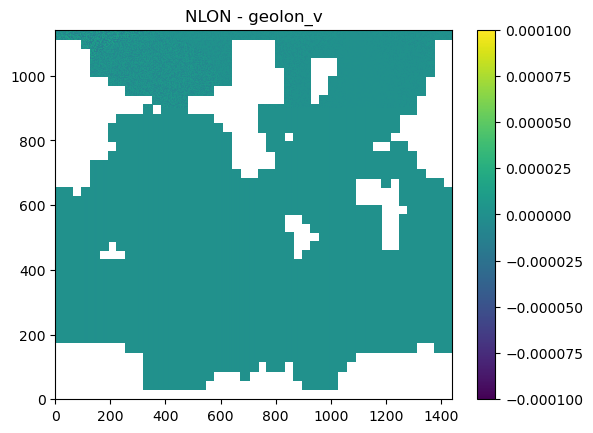

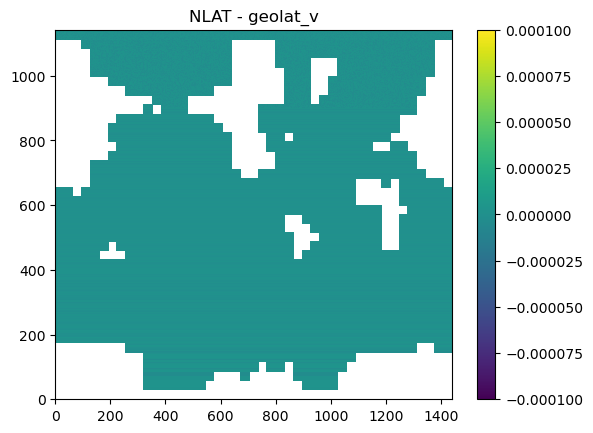

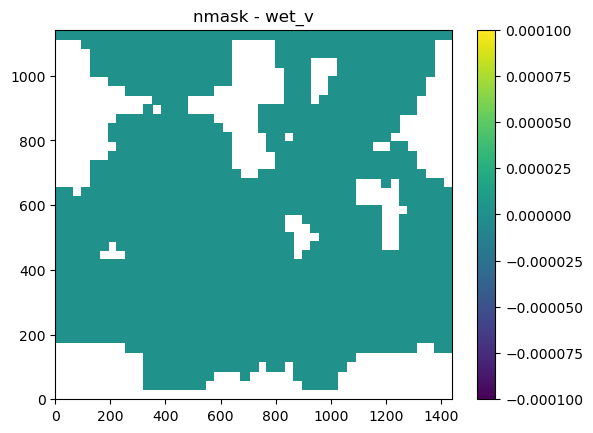

In [24]:
#mapping from CICE to MOM names
var_map = [
    ('NLON', 'geolon_v'),
    ('NLAT', 'geolat_v'),
    ('nmask','wet_v'),
]

for c,m in var_map:
    plt.pcolor((cice_ds[c].values - (mom_ds[m]).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

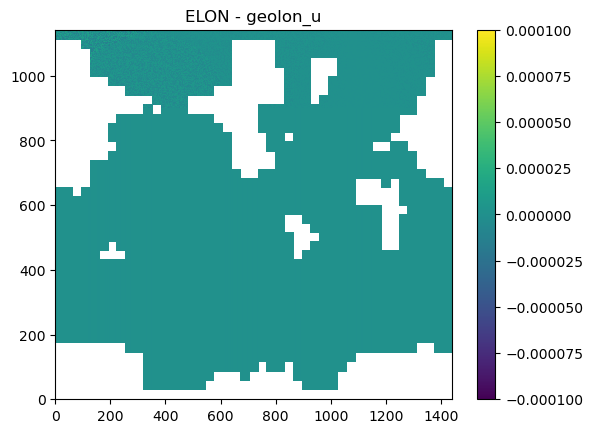

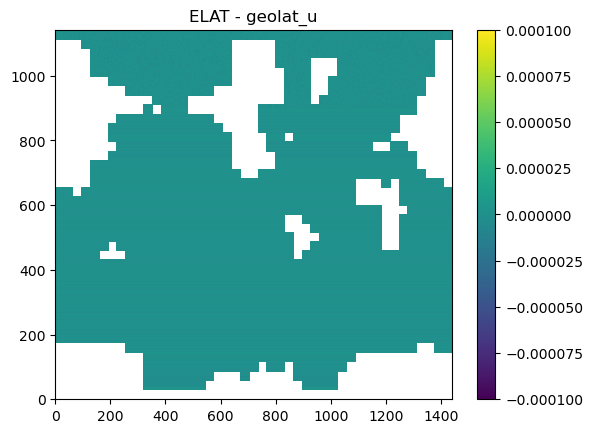

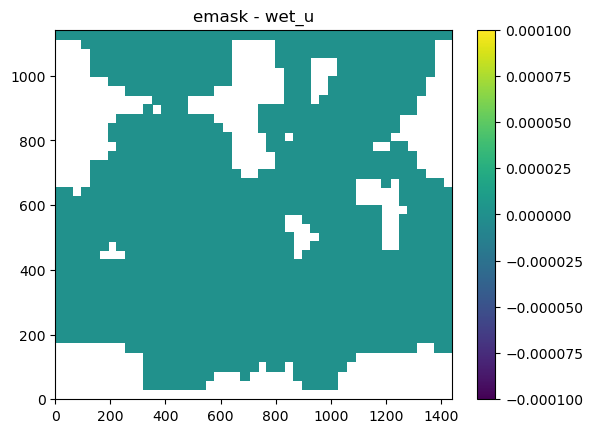

In [25]:
#mapping from CICE to MOM names
var_map = [
    ('ELON', 'geolon_u'),
    ('ELAT', 'geolat_u'),
    ('emask','wet_u'),
]

for c,m in var_map:
    plt.pcolor((cice_ds[c].values - (mom_ds[m]).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

# Compare areas

In [26]:
cice_ds.tarea.max()

<xarray.DataArray 'tarea' ()> Size: 8B
array(7.72768256e+08)

In [27]:
mom_ds.areacello.max()

<xarray.DataArray 'areacello' ()> Size: 8B
array(7.72768256e+08)

single precision for area would be approx 1e4

In [28]:
mom_ds

<xarray.Dataset> Size: 132MB
Dimensions:       (xh: 1440, yh: 1142, time: 1, xq: 1440, yq: 1142)
Coordinates:
  * xh            (xh) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yh            (yh) float64 9kB -80.94 -80.87 -80.81 ... 89.74 89.84 89.95
  * time          (time) object 8B 0001-01-01 00:00:00
  * xq            (xq) float64 12kB -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yq            (yq) float64 9kB -80.9 -80.84 -80.77 ... 89.79 89.9 90.0
Data variables: (12/20)
    geolon        (yh, xh) float32 7MB nan nan nan nan ... 80.0 80.0 80.0 80.0
    geolat        (yh, xh) float32 7MB nan nan nan nan ... 65.26 65.16 65.05
    geolon_c      (yq, xq) float32 7MB nan nan nan nan ... 80.0 80.0 80.0 80.0
    geolat_c      (yq, xq) float32 7MB nan nan nan nan ... 65.21 65.11 65.0
    geolon_u      (yh, xq) float32 7MB nan nan nan nan ... 80.0 80.0 80.0 80.0
    geolat_u      (yh, xq) float32 7MB nan nan nan nan ... 65.21 65.11 65.0
    ...            ...
    areacello     (yh, xh) float32 7MB nan nan nan ... 1.677e+06 5.63e+05
    areacello_cu  (yh, xq) float32 7MB ...
    areacello_cv  (yq, xh) float32 7MB ...
    areacello_bu  (yq, xq) float32 7MB ...
    sin_rot       (yh, xh) float32 7MB ...
    cos_rot       (yh, xh) float32 7MB ...
Attributes:
    NumFilesInSet:  1
    title:          MOM6 diagnostic fields table
    grid_type:      regular
    grid_tile:      N/A

single precision is about ~1e4 precision

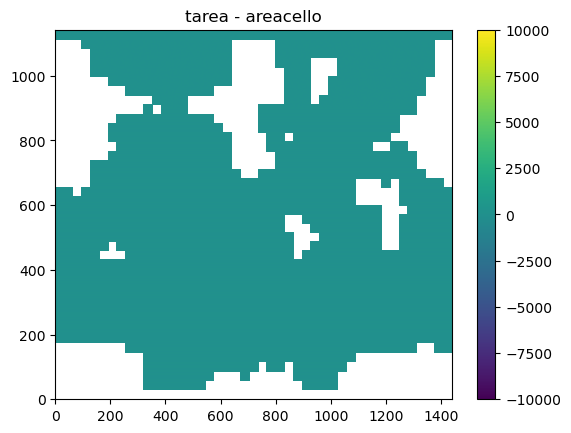

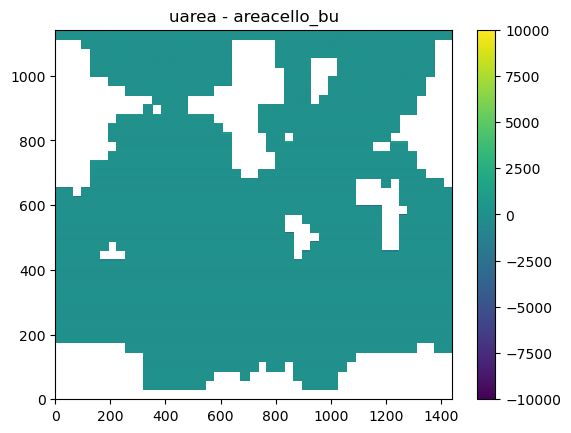

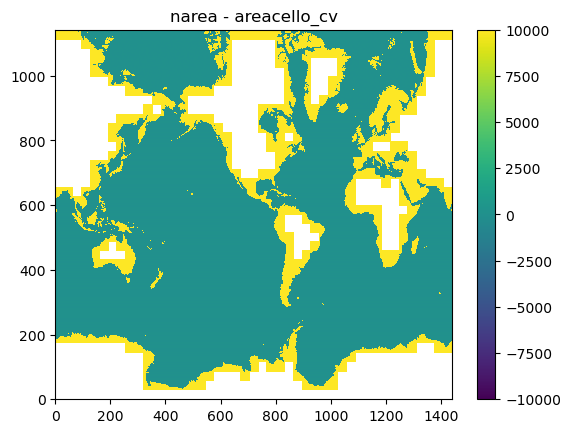

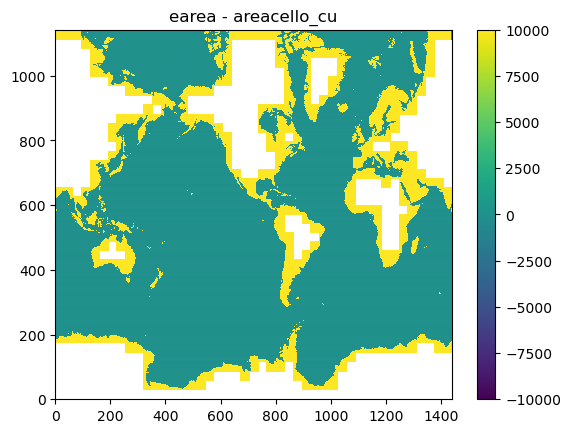

In [29]:
#mapping from CICE to MOM names
var_map = [
    ('tarea','areacello'),
    ('uarea','areacello_bu'),
    ('narea','areacello_cv'),
    ('earea','areacello_cu')
]

for c,m in var_map:
    plt.pcolor((cice_ds[c].values - (mom_ds[m]).values), vmin=-1e4, vmax=1e4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

MOM6 doesnt output bounds

In [30]:
bounds_vars = ['lont_bounds',
 'latt_bounds',
 'lonu_bounds',
 'latu_bounds',
 'lonn_bounds',
 'latn_bounds',
 'lone_bounds',
 'late_bounds']

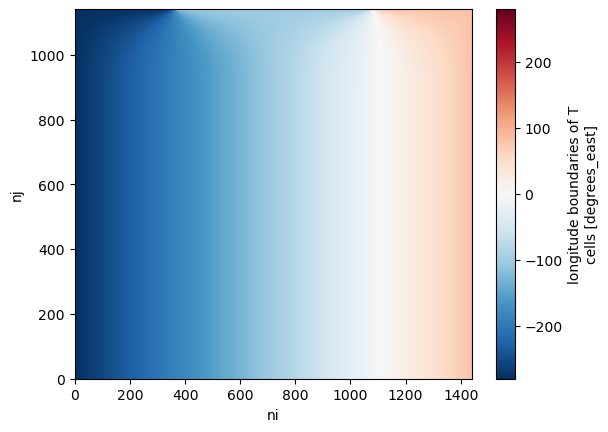

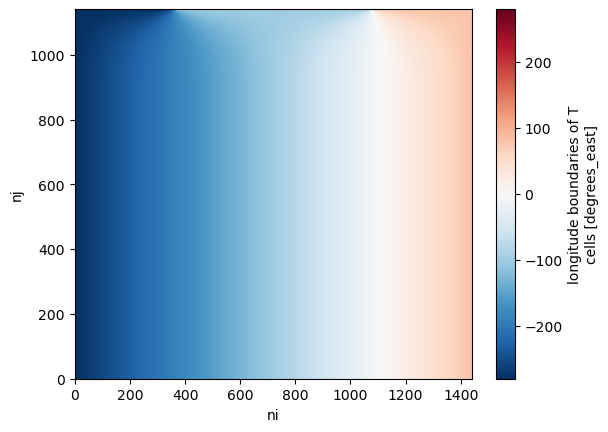

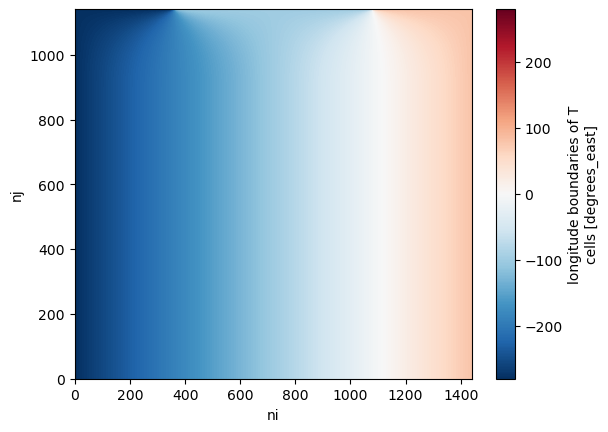

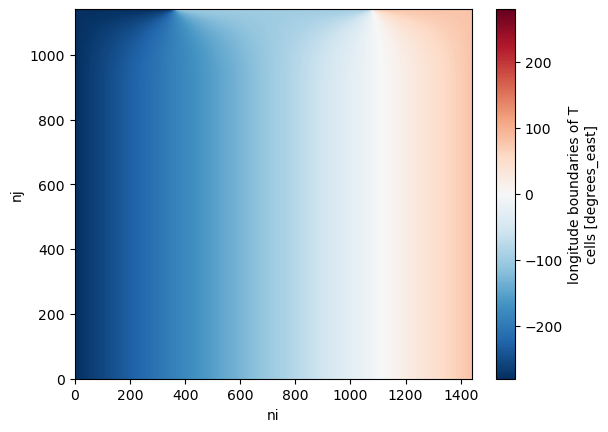

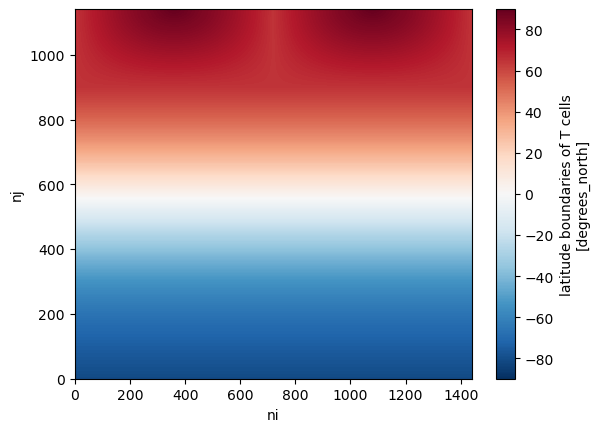

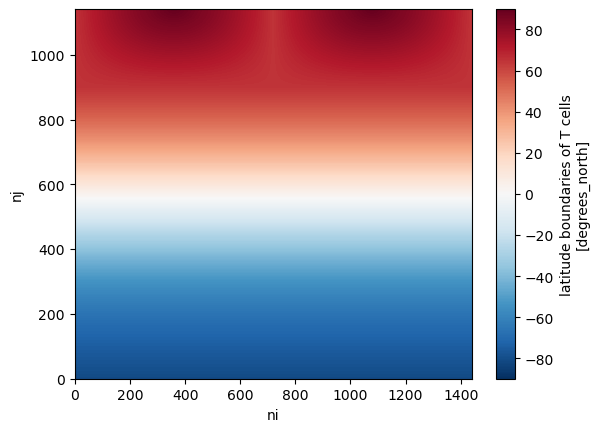

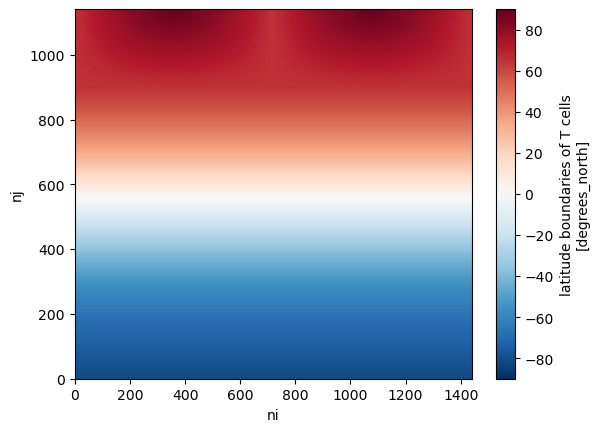

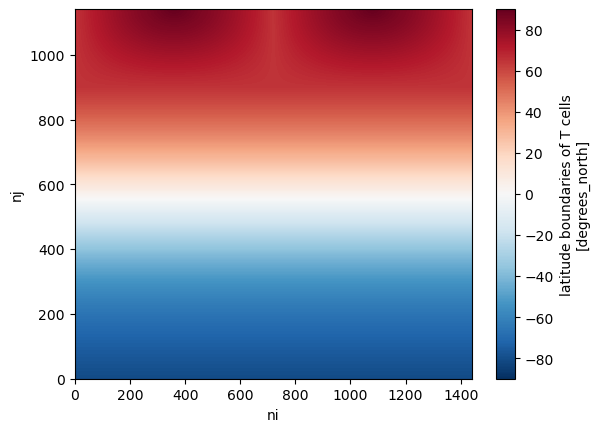

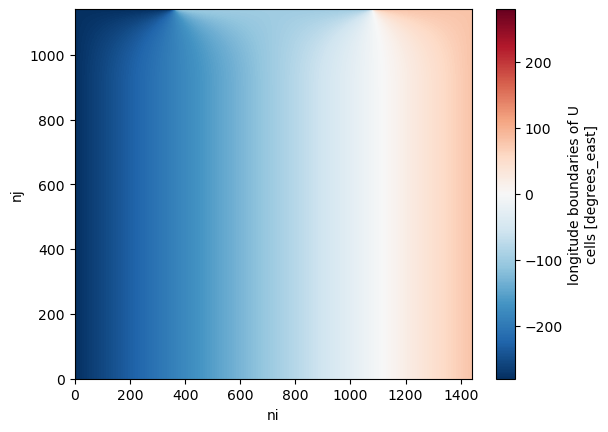

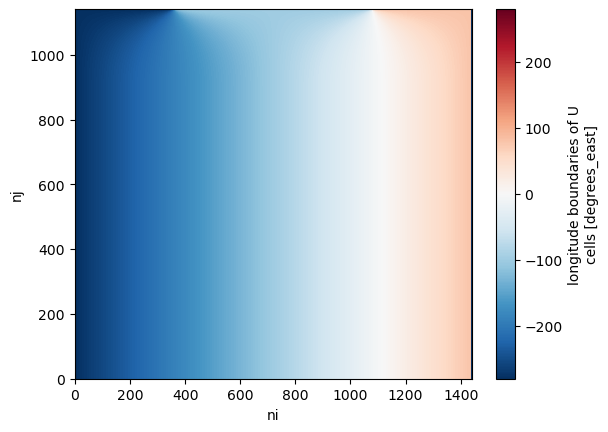

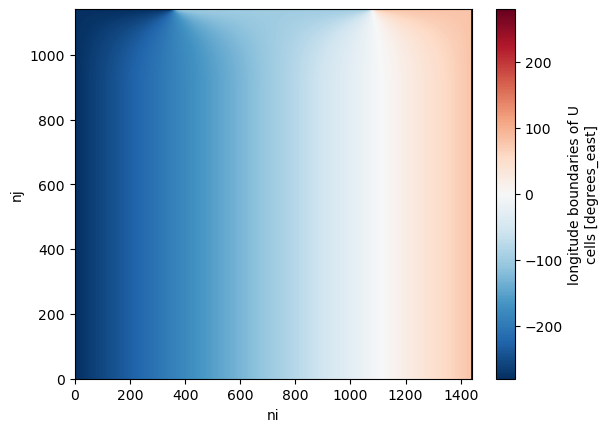

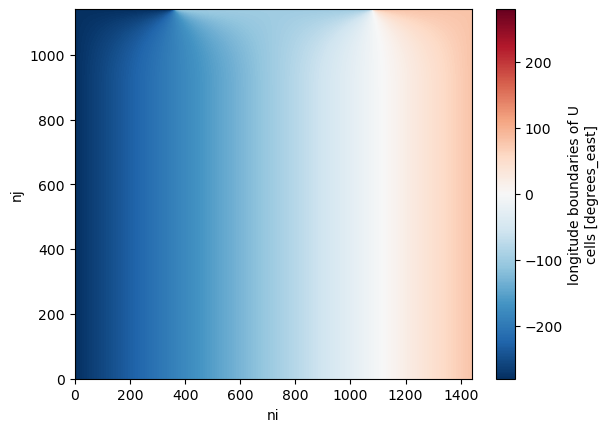

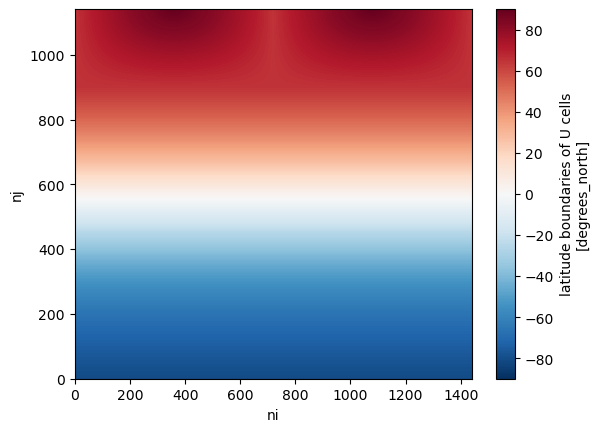

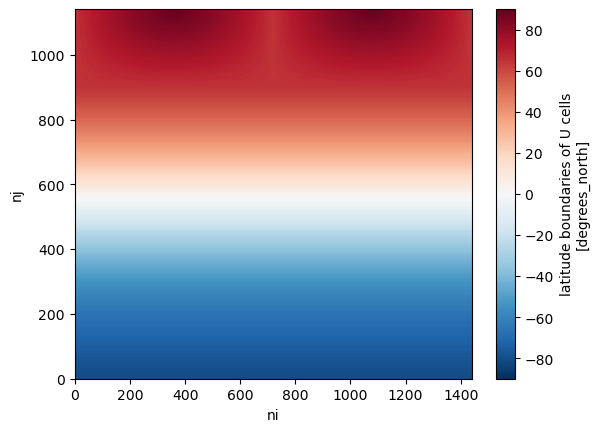

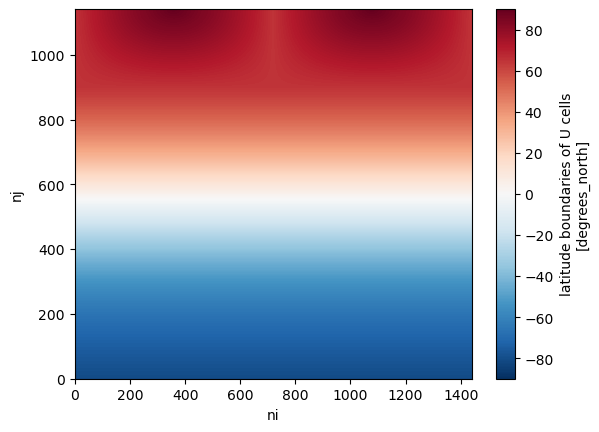

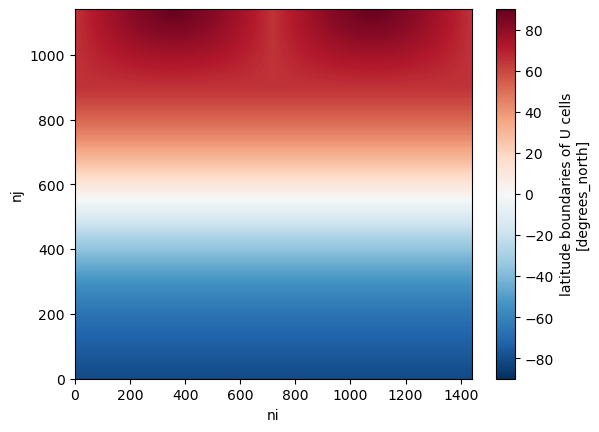

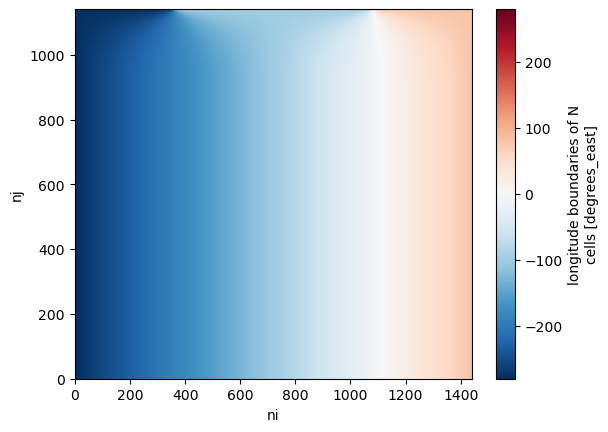

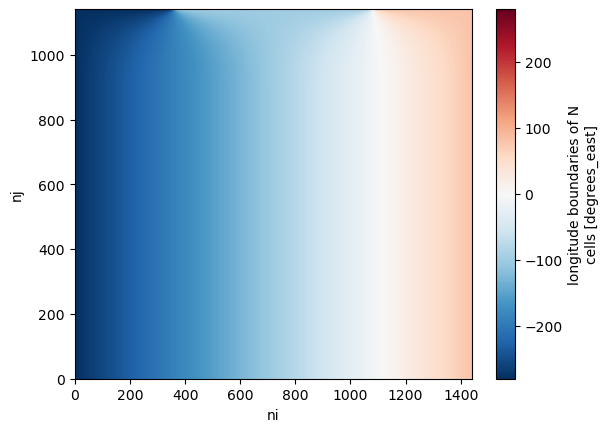

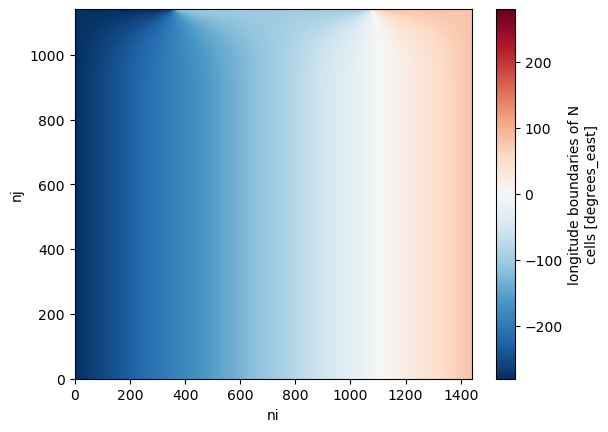

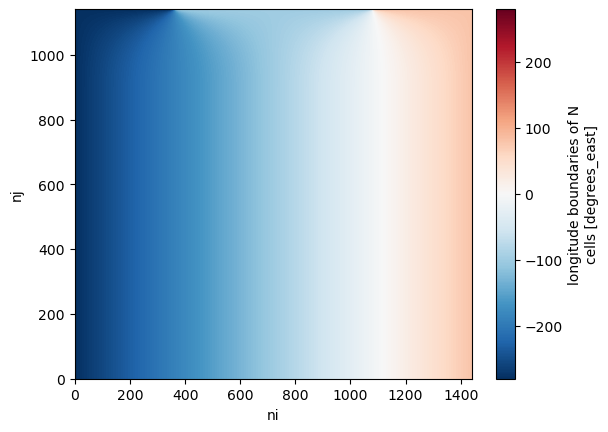

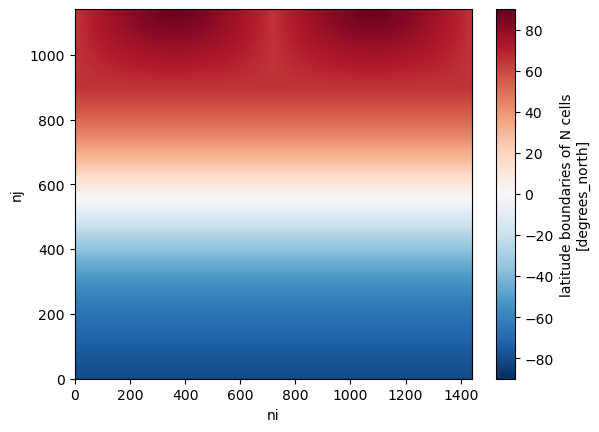

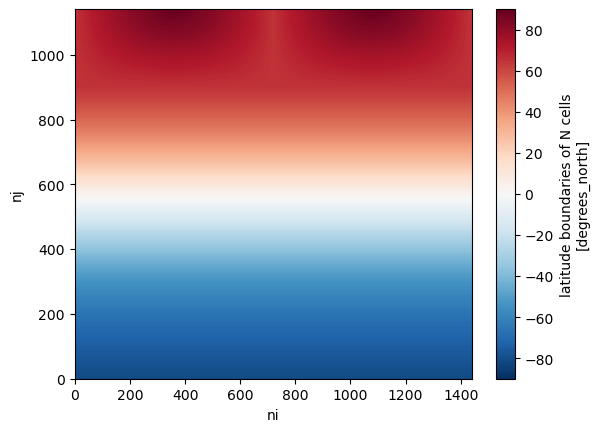

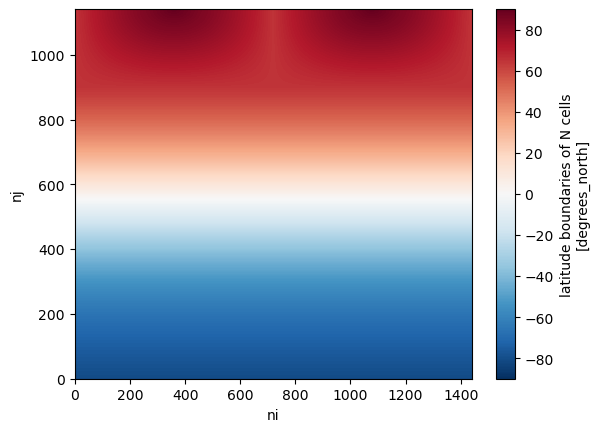

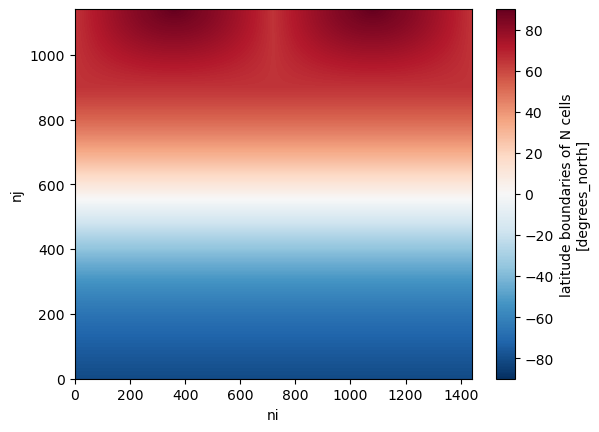

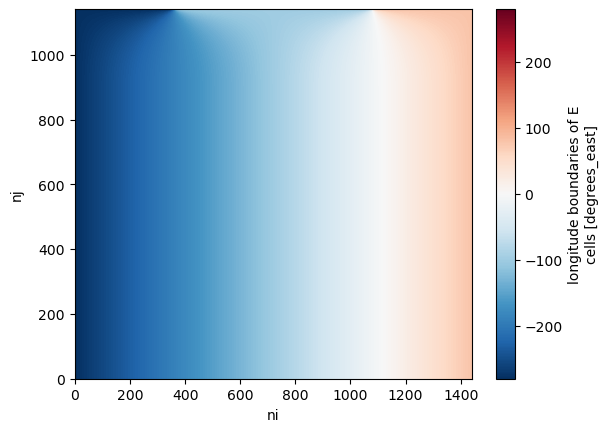

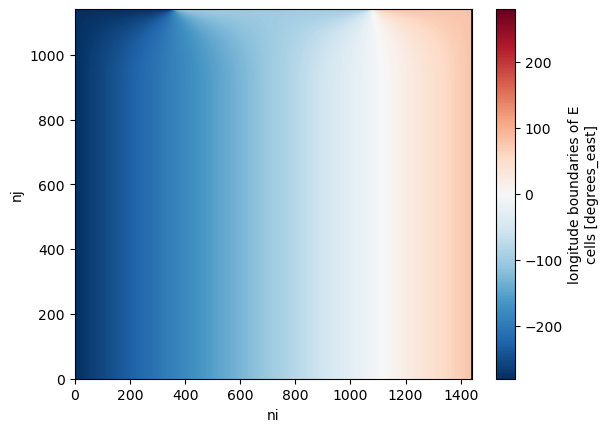

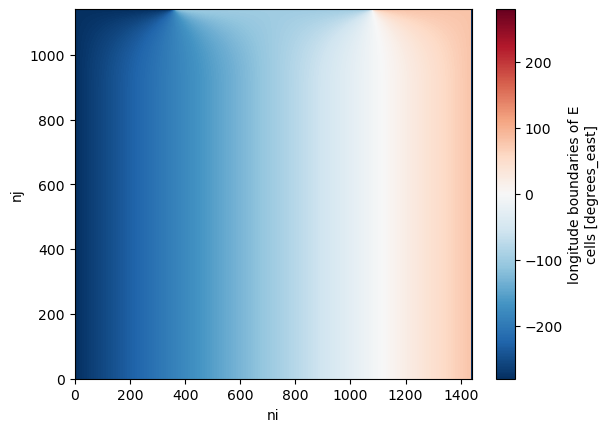

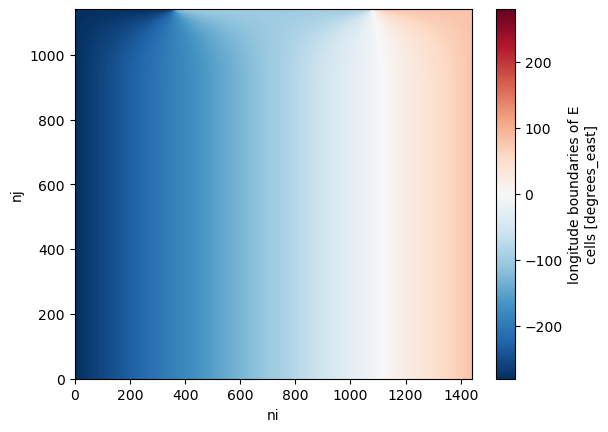

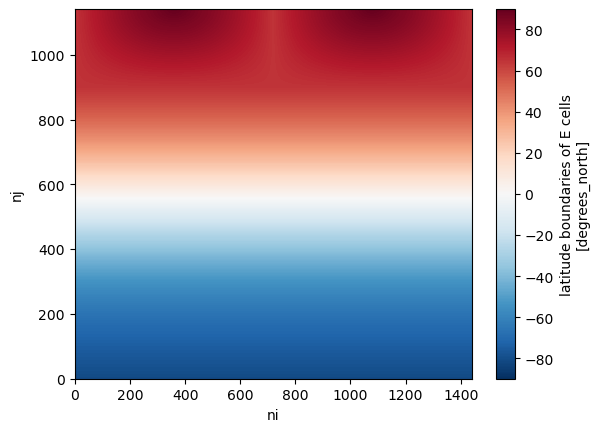

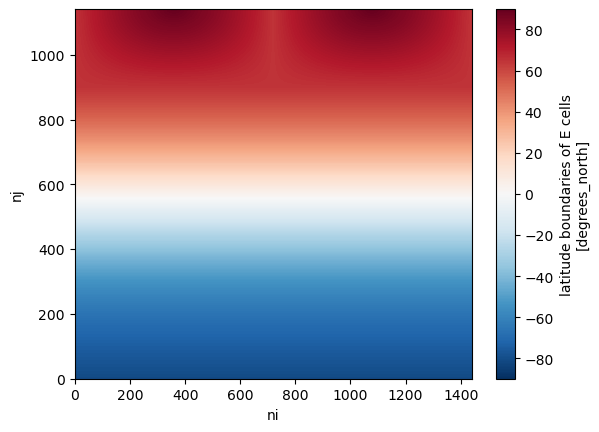

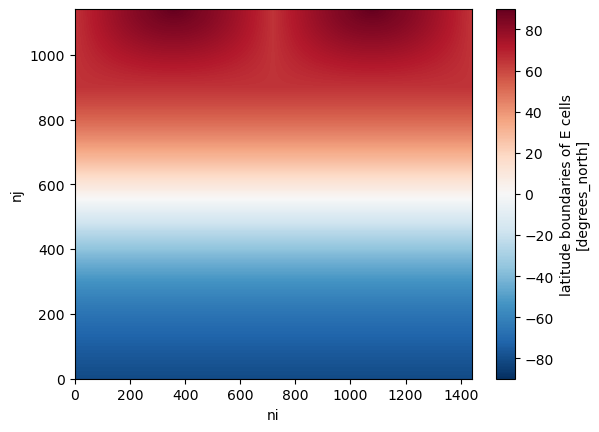

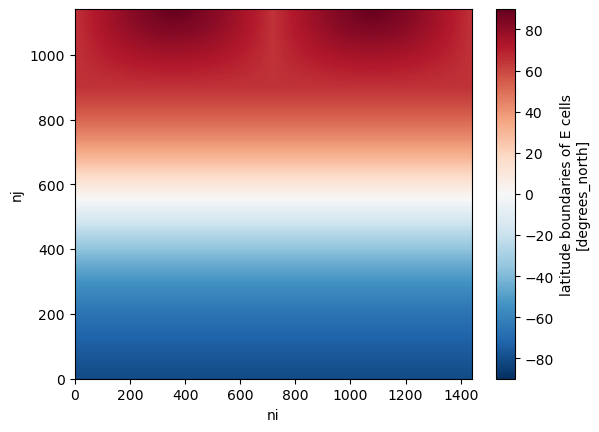

In [31]:
for g in bounds_vars:
    for nvetices in range(0,4):
        cice_ds[g].isel(nvertices=nvetices).plot()
        plt.show()

Work from bounds back to LAT / LON

1. ULAT is NE corner of T cells

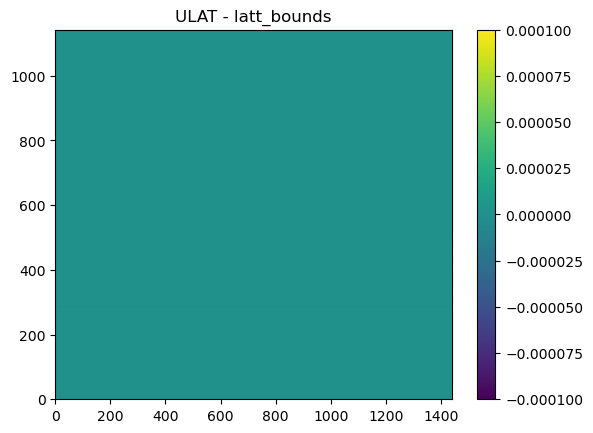

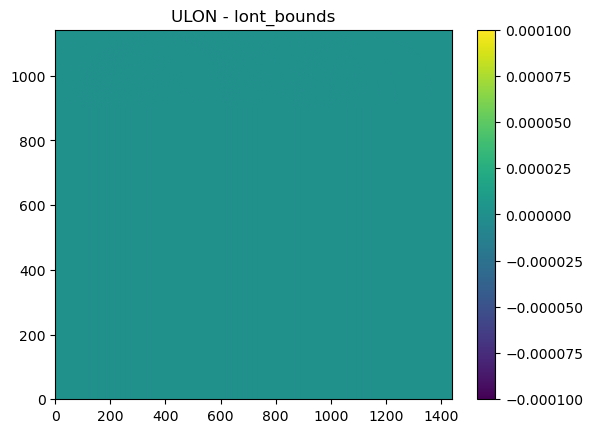

In [32]:
var_map = [
    ('ULAT','latt_bounds'),
    ('ULON','lont_bounds'),
]


for c,m in var_map:
    plt.pcolor((cice_ds[c].values - cice_ds[m].isel(nvertices=2).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

TLAT is SW corner of U cells

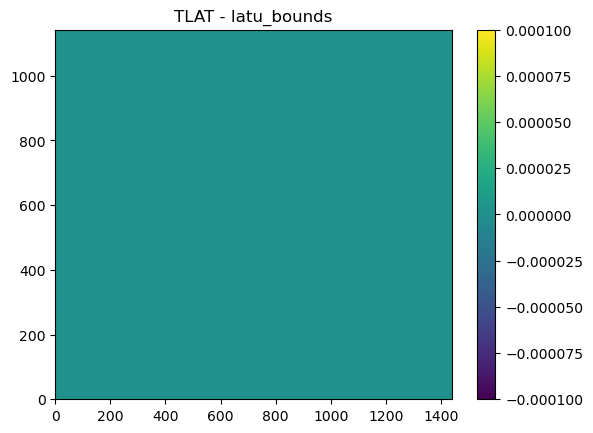

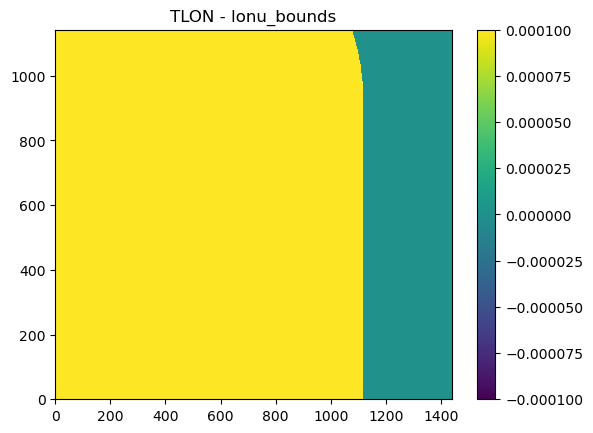

In [33]:
var_map = [
    ('TLAT','latu_bounds'),
    ('TLON','lonu_bounds'),
]


for c,m in var_map:
    plt.pcolor((cice_ds[c].values - cice_ds[m].isel(nvertices=0).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

ELAT is SE corner of N cells

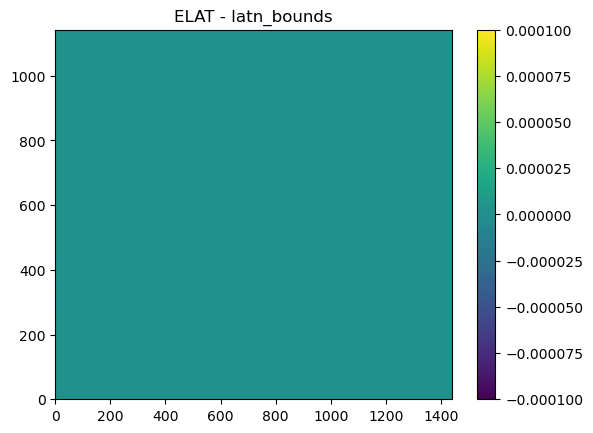

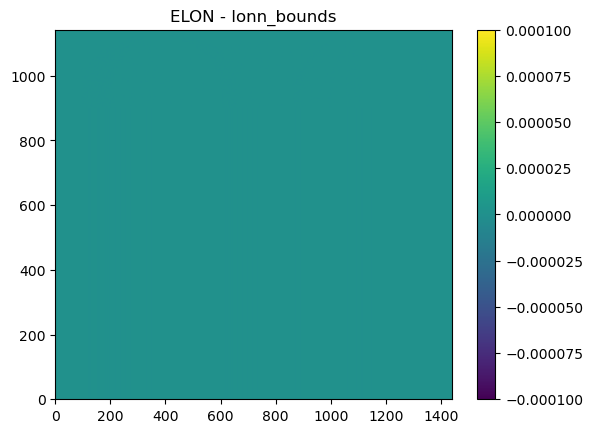

In [34]:
var_map = [
    ('ELAT','latn_bounds'),
    ('ELON','lonn_bounds'),
]


for c,m in var_map:
    plt.pcolor((cice_ds[c].values - cice_ds[m].isel(nvertices=1).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

NLAT is NW corner of E cells

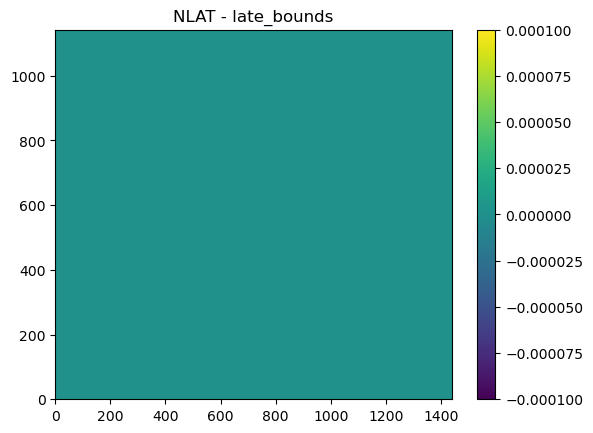

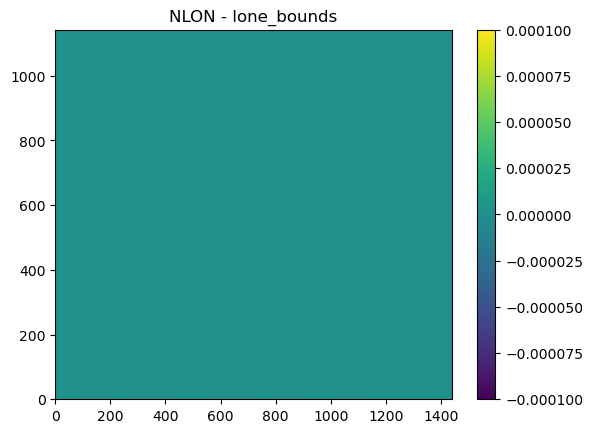

In [35]:
var_map = [
    ('NLAT','late_bounds'),
    ('NLON','lone_bounds'),
]


for c,m in var_map:
    plt.pcolor((cice_ds[c].values - cice_ds[m].isel(nvertices=3).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

# Compare sidelengths

In [12]:
cice_ds

<xarray.Dataset> Size: 960MB
Dimensions:      (time: 1, nbnd: 2, nj: 1142, ni: 1440, nc: 5, nkice: 4,
                  nksnow: 1, nkbio: 3, nkaer: 5, nvertices: 4)
Coordinates:
  * time         (time) object 8B 1900-01-01 12:00:00
    TLON         (nj, ni) float64 13MB ...
    TLAT         (nj, ni) float64 13MB ...
    ULON         (nj, ni) float64 13MB ...
    ULAT         (nj, ni) float64 13MB ...
    NLON         (nj, ni) float64 13MB ...
    NLAT         (nj, ni) float64 13MB ...
    ELON         (nj, ni) float64 13MB ...
    ELAT         (nj, ni) float64 13MB ...
Dimensions without coordinates: nbnd, nj, ni, nc, nkice, nksnow, nkbio, nkaer,
                                nvertices
Data variables: (12/47)
    time_bounds  (time, nbnd) object 16B ...
    NCAT         (nc) float64 40B ...
    VGRDi        (nkice) float64 32B ...
    VGRDs        (nksnow) float64 8B ...
    VGRDb        (nkbio) float64 24B ...
    VGRDa        (nkaer) float64 40B ...
    ...           ...
    congel       (time, nj, ni) float64 13MB ...
    frazil       (time, nj, ni) float64 13MB ...
    snoice       (time, nj, ni) float64 13MB ...
    dvidtt       (time, nj, ni) float64 13MB ...
    dvidtd       (time, nj, ni) float64 13MB ...
    sifb         (time, nj, ni) float64 13MB ...
Attributes:
    title:               access-om3
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 19000102
    comment3:            seconds elapsed into model date:      0
    time_period_freq:    day_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2025-03-26 at 09:46
    io_flavor:           io_pio2 hdf5

In [11]:
mom_ds

<xarray.Dataset> Size: 178MB
Dimensions:       (xh: 1440, yh: 1142, time: 1, xq: 1440, yq: 1142)
Coordinates:
  * xh            (xh) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yh            (yh) float64 9kB -80.94 -80.87 -80.81 ... 89.74 89.84 89.95
  * time          (time) object 8B 0001-01-01 00:00:00
  * xq            (xq) float64 12kB -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yq            (yq) float64 9kB -80.9 -80.84 -80.77 ... 89.79 89.9 90.0
Data variables: (12/27)
    geolon        (yh, xh) float32 7MB ...
    geolat        (yh, xh) float32 7MB ...
    geolon_c      (yq, xq) float32 7MB ...
    geolat_c      (yq, xq) float32 7MB ...
    geolon_u      (yh, xq) float32 7MB ...
    geolat_u      (yh, xq) float32 7MB ...
    ...            ...
    dyt           (yh, xh) float32 7MB ...
    dxCu          (yh, xq) float32 7MB ...
    dyCu          (yh, xq) float32 7MB ...
    dxCv          (yq, xh) float32 7MB ...
    dyCv          (yq, xh) float32 7MB ...
    dxCvo         (yq, xh) float32 7MB ...
Attributes:
    NumFilesInSet:  1
    title:          MOM6 diagnostic fields table
    grid_type:      regular
    grid_tile:      N/A

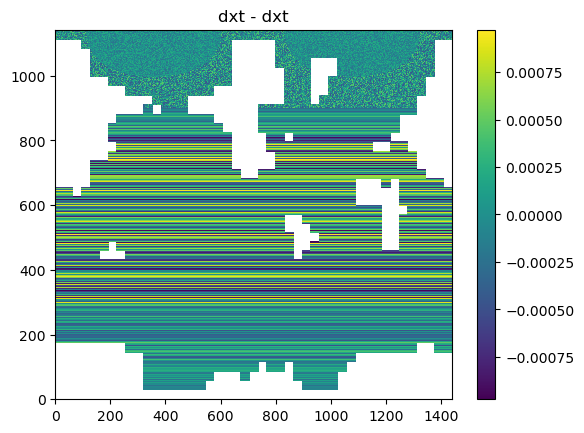

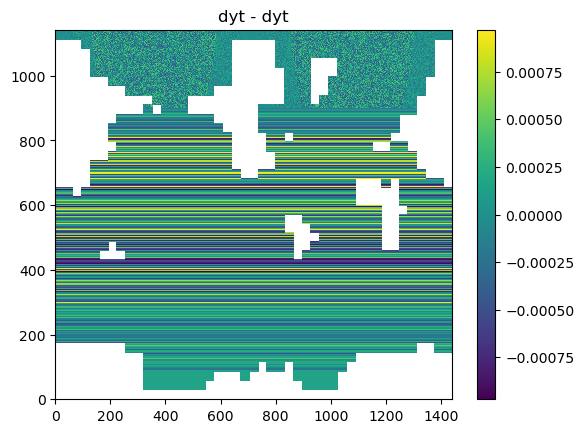

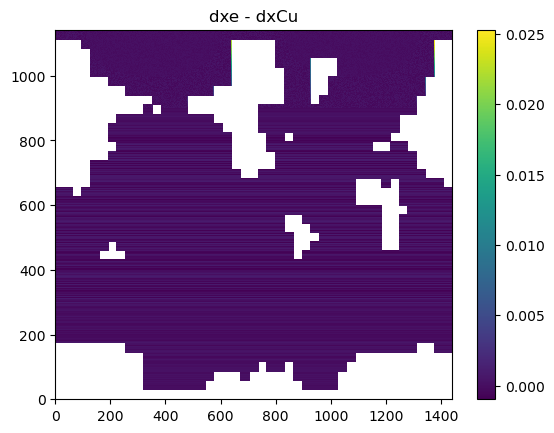

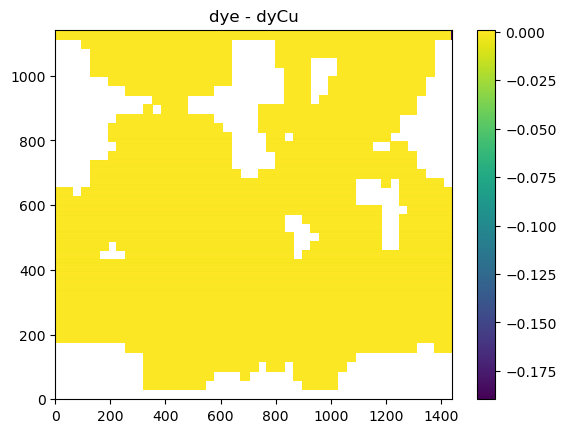

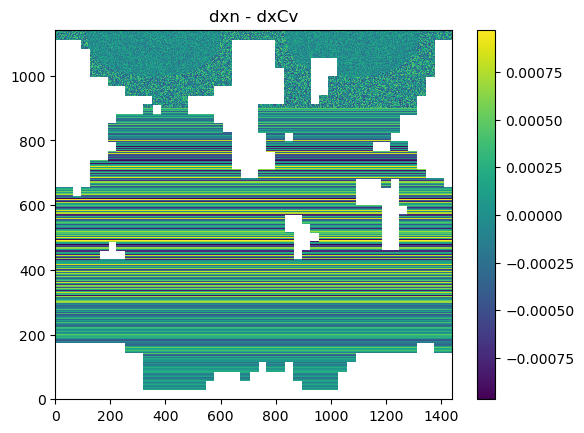

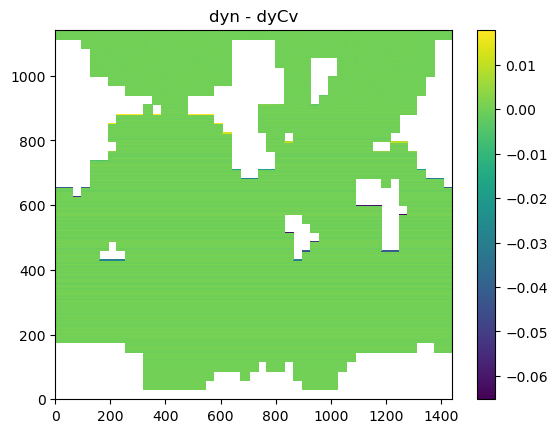

In [19]:
#mapping from CICE to MOM names
var_map = [
    ('dxt','dxt'),
    ('dyt','dyt'),
    ('dxe','dxCu'),
    ('dye','dyCu'),
    ('dxn','dxCv'),
    ('dyn','dyCv'),
    # ('dxu',''), I can't find MOM equivalent for these two
    # ('dyu',''),
]

for c,m in var_map:
    plt.pcolor((cice_ds[c].values - (mom_ds[m]).values)) #, vmin=-0.1, vmax=0.1)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

And the mediator areas (hardcoded for 1 degree):

In [ ]:
mesh_med = xr.open_dataset('/g/data/vk83/configurations/inputs/access-om3/share/meshes/global.1deg/2024.01.25/access-om2-1deg-ESMFmesh.nc')

In [ ]:
mesh_med

In [ ]:
plt.pcolor((mesh_med.elementArea).values.reshape(300,360) - cice_ds.tarea.values)

plt.colorbar()

In [ ]:
R = 6.37122e6

In [ ]:
mesh_lon = mesh_med.centerCoords.isel(coordDim=0).values.reshape(300,360)

In [ ]:
mesh_lat = mesh_med.centerCoords.isel(coordDim=1).values.reshape(300,360)

In [ ]:
(cice_ds.TLON-mesh_lon).plot()

In [ ]:
(cice_ds.TLON-mesh_lat).plot()

In [ ]:
mesh_areas = mesh_med.elementArea.values.reshape(300,360)

In [ ]:
(cice_ds.tarea - mesh_areas).plot()

In [ ]:
(cice_ds.tarea / mesh_areas).plot(vmin=0.98, vmax=1.02)

In [ ]:
med = xr.open_dataset('/g/data/tm70/as2285/payu/MOM6-CICE6/archive/output000/access-om3.cpl.hx.ice.3h.avrg.1900-01-01-10800.nc')

In [ ]:
med

In [ ]:
plt.pcolor(med.iceImp_lon.isel(time=0).values-cice_ds.TLON.values)
plt.colorbar()

In [ ]:
plt.pcolor(med.iceImp_lat.isel(time=0).values-cice_ds.TLAT.values)
plt.colorbar()

In [ ]:
plt.pcolor(mesh_med.elementMask.values.reshape(300,360) - cice_ds.tmask.values )
plt.colorbar()

In [ ]:
mediator_area = med.iceImp_Si_mesharea.isel(time=0)*R*R

In [ ]:
mediator_area.max()

The internally calculated mediator areas vs the cice areas are a bit different, although in the 5th significant figure:

In [ ]:
plt.pcolor((mediator_area).values - cice_ds.tarea.values, vmin=-1e6, vmax=1e6)
plt.colorbar()

In [ ]:
med.iceImp_Si_areacor.isel(time=0).plot(vmin=0.99, vmax=1.01)

In [ ]:
med.iceImp_Si_areacor.isel(time=0).min()

In [ ]:
med.iceImp_Si_areacor.isel(time=0).max()